# **Estudio de Startups en el mundo según su valuación de mercado**

#### por Franco Luis Blardone

-------------------------

Este repositorio contiene un análisis de datos de distintas Startups en el mundo, centrando su análisis en país de origen, valuación e industria a la cual pertenecen. Los datos obtenidos corresponden al año 2021.

Nos centraremos en aquellas startups denominadas **"Unicornios"** que son aquellas que alcanzan una valuación de 1 Billón de USD sin ser listadas en los mercados de acciones.

## Objetivos

El objetivo es estudiar las relaciones entre el surgimiento de estas compañías y responder los siguientes interrogantes:
- Qué industria tiene mayor cantidad de startups
- Qué país concentra la mayor cantidad de startups
- Qué valuación total significan estas startups
- Cantidad de estas compañías que tiene el potencial de sobrevivir en el mercado.

## Tabla de contenidos

1. Carga de datos
2. Exploración
3. Limpieza de datos
4. Presentación de los datos
5. Conclusiones
6. Referencias

--------------------------


## 1. Carga de datos

Este Dataset fue descargado en formato .csv de la web pública Kaggle.

Link to Dataset: https://www.kaggle.com/khaiid/startups-by-valuation

In [9]:
#importamos librerias

import pandas as pd

import numpy as np 

import seaborn as sns

import matplotlib.pyplot as plt

#habilitamos matplotlib

%matplotlib inline

from matplotlib import style

style.use('seaborn-pastel')


In [10]:
#definimos el path al Dataset e importamos los datos al Dataframe

from os import path

archivo = "data\Startups.csv"

print(f"El Dataset se encuentra en el destino {path.abspath(archivo)}")

path = "data\Startups.csv"

df = pd.read_csv(path)


El Dataset se encuentra en el destino C:\Users\Lenovo\Documents\GitHub\Proyecto-Final---Startups\data\Startups.csv


## 2. Exploración

In [11]:
#forma del Dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
print()
      
#informacion del Dataframe
df.info()

#visualizacion rapida random
df.sample(5)


El dataset tiene 250 filas y 5 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         250 non-null    object 
 1   Valuation       250 non-null    float64
 2   Valuation_date  250 non-null    object 
 3   Industry        233 non-null    object 
 4   Country         250 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


,Company,Valuation,Valuation_date,Industry,Country
112,Socure,4.5,November-21,Identity management,United States
209,Urban Company,2.8,December-21,Home improvement,India
61,Razorpay,7.5,December-21,Fintech,India
79,Wiz,6.0,October-21,Cybersecurity,Israel
20,DJI,15.0,September-16,Technology,China


In [12]:
#visualizacion de los extremos del Dataframe
df.head(5)

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States / Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia


In [13]:
df.tail(5)

,Company,Valuation,Valuation_date,Industry,Country
245,Bitso,2.20,May-21,Cryptocurrency,Mexico
246,Gympass,2.20,June-21,NaN,Brazil / United States
247,Kurly,2.20,July-21,E-commerce,South Korea
248,Addepar,2.17,June-21,Fintech,United States
249,Eightfold.ai,2.10,June-21,Artificial intelligence,United States


In [93]:
df.Valuation.unique()

array([140.  , 100.  ,  95.  ,  45.6 ,  40.  ,  39.  ,  38.  ,  33.  ,
        30.  ,  28.7 ,  25.  ,  21.  ,  20.  ,  18.  ,  17.  ,  16.5 ,
        15.5 ,  15.  ,  13.4 ,  13.  ,  12.4 ,  12.3 ,  12.  ,  11.75,
        11.  ,  10.  ,   9.6 ,   9.5 ,   9.  ,   8.7 ,   8.6 ,   8.5 ,
         8.3 ,   8.1 ,   8.  ,   7.75,   7.6 ,   7.56,   7.5 ,   7.4 ,
         7.3 ,   7.25,   7.  ,   6.8 ,   6.6 ,   6.5 ,   6.3 ,   6.04,
         6.  ,   5.77,   5.7 ,   5.6 ,   5.5 ,   5.4 ,   5.3 ,   5.25,
         5.2 ,   5.1 ,   5.  ,   4.9 ,   4.75,   4.6 ,   4.5 ,   4.4 ,
         4.3 ,   4.2 ,   4.15,   4.1 ,   4.05,   4.  ,   3.95,   3.8 ,
         3.75,   3.7 ,   3.6 ,   3.55,   3.5 ,   3.35,   3.33,   3.3 ,
         3.4 ,   3.2 ,   3.15,   3.1 ,   3.  ,   2.9 ,   2.85,   2.8 ,
         2.78,   2.75,   2.7 ,   2.63,   2.6 ,   2.56,   2.5 ,   2.45,
         2.4 ,   2.39,   2.33,   2.3 ,   2.25,   2.2 ,   2.17,   2.1 ])

In [81]:
df.Industry.unique()

array(['Internet', 'Aerospace', 'Financial services', 'Fintech',
       'Graphic design', 'Retail', 'Software', 'Video games',
       'Cryptocurrency', 'Education technology', 'E-commerce',
       'Technology', 'Financial Technology', 'Finance', 'Health', nan,
       'Artificial intelligence', 'Batteries', 'Self-driving cars',
       'Marketplace', 'Venture capital', 'Internet media',
       'Computer software', 'Software as a service', 'Hospitality',
       'Marketing', 'Software development', 'Robotics',
       'Application security', 'Cloud security', 'Fantasy sports',
       'Logistics', 'Virtual events', 'NFT', 'Computer security',
       'Transportation', 'Travel', 'Robotic process automation',
       'Healthcare', 'Real estate technology', 'Workforce management',
       'Real estate', 'Cybersecurity', 'Collaborative software',
       'Mass media', 'Data infrastructure', 'Health technology',
       'Food delivery', 'Data governance', 'Ghost kitchen',
       'Electronic Cigarettes

In [82]:
df.nunique()

Company           250
Valuation         104
Valuation_date     50
Industry           81
Country            40
dtype: int64

Para cerrar la seccion se pone una breve descripcion de lo que encontramos en los datos

## 3. Limpieza de datos

In [30]:
#hacer una copia del df

clean_df = df.copy()

Desde aquí en adelante trabajaremos con la copia del dataframe

In [31]:
#renombramos la columna Industry

clean_df= clean_df.rename(columns={"Industry":"Industry_Field"})

clean_df

clean_df.columns


Index(['Company', 'Valuation', 'Valuation_date', 'Industry_Field', 'Country'], dtype='object')

In [100]:
#Renombramos la columna Valuation especificando que está valuado en Billones

clean_df = clean_df.rename(columns={'Valuation' : 'Valuation_Billions'})

#clean_df.columns

In [109]:
clean_df['Valuation_Billions'] = clean_df['Valuation_Billions']

In [110]:
clean_df.Valuation_Billions.unique()

#como eliminar esos espacios vacios? con replace?

array([140.  , 100.  ,  95.  ,  45.6 ,  40.  ,  39.  ,  38.  ,  33.  ,
        30.  ,  28.7 ,  25.  ,  21.  ,  20.  ,  18.  ,  17.  ,  16.5 ,
        15.5 ,  15.  ,  13.4 ,  13.  ,  12.4 ,  12.3 ,  12.  ,  11.75,
        11.  ,  10.  ,   9.6 ,   9.5 ,   9.  ,   8.7 ,   8.6 ,   8.5 ,
         8.3 ,   8.1 ,   8.  ,   7.75,   7.6 ,   7.56,   7.5 ,   7.4 ,
         7.3 ,   7.25,   7.  ,   6.8 ,   6.6 ,   6.5 ,   6.3 ,   6.04,
         6.  ,   5.77,   5.7 ,   5.6 ,   5.5 ,   5.4 ,   5.3 ,   5.25,
         5.2 ,   5.1 ,   5.  ,   4.9 ,   4.75,   4.6 ,   4.5 ,   4.4 ,
         4.3 ,   4.2 ,   4.15,   4.1 ,   4.05,   4.  ,   3.95,   3.8 ,
         3.75,   3.7 ,   3.6 ,   3.55,   3.5 ,   3.35,   3.33,   3.3 ,
         3.4 ,   3.2 ,   3.15,   3.1 ,   3.  ,   2.9 ,   2.85,   2.8 ,
         2.78,   2.75,   2.7 ,   2.63,   2.6 ,   2.56,   2.5 ,   2.45,
         2.4 ,   2.39,   2.33,   2.3 ,   2.25,   2.2 ,   2.17,   2.1 ])

In [33]:
#verificamos si hay valores nulos 

clean_df.isnull().sum()


Company                0
Valuation_Billions     0
Valuation_date         0
Industry_Field        17
Country                0
dtype: int64

In [37]:
print(f"Encontramos {clean_df.isnull().Industry_Field.sum()} valores NaN que deben ser reemplazados")


Encontramos 17 valores NaN que deben ser reemplazados


In [38]:
#Cambiamos los valores NaN por "Not determined" ya que hace referencia al tipo de industria

clean_df['Industry_Field'] = clean_df.Industry_Field.fillna('Undetermined')

In [40]:
#Eliminamos espacios en blanco en categoría Country

clean_df['Country'] = clean_df['Country'].str.strip()

In [41]:
clean_df.Industry_Field.value_counts()

Fintech                    24
Software                   23
Undetermined               17
E-commerce                 15
Artificial intelligence    10
                           ..
Financial Technology        1
Cloud security              1
Real estate technology      1
Cloud communications        1
Wearable technology         1
Name: Industry_Field, Length: 82, dtype: int64

------------------

## 4. Presentación de los datos


In [42]:
#hacer esto en una función?

industry_country = clean_df.groupby('Country')['Industry_Field'].count().sort_values(ascending = False).head(10)

industry_country


Country
United States              114
India                       27
China                       26
United Kingdom              11
Germany                      6
Canada                       6
South Korea                  6
France                       5
Israel /  United States      3
Israel                       3
Name: Industry_Field, dtype: int64

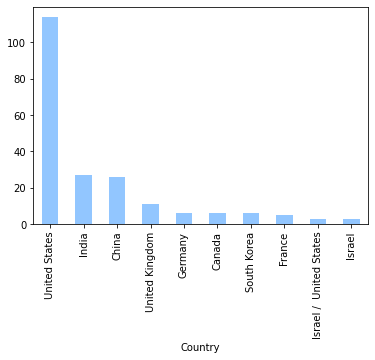

In [58]:
industry_country_plot = industry_country.plot.bar();

In [86]:
#crear nuevo dataframe?

country_valuation = clean_df.groupby(['Country', 'Valuation_Billions', 'Industry_Field'])['Valuation_Billions'].sum().sort_values(ascending = False).head(10)

#country_valuation

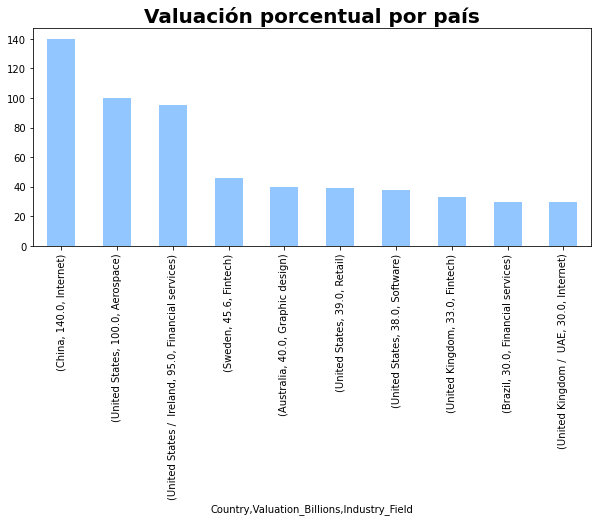

In [91]:
country_valuation_plot = country_valuation.plot.bar(figsize=(10,4));

plt.title('Valuación porcentual por país', fontdict = {'fontsize':20, 'fontweight':'bold'});

# HACER UN GRAFICO QUE REUNA LA VALUACION TOTAL MÁXIMA POR PAIS Y QUE MUESTRE A QUE INDUSTRIA PERTENECE. GRAFICO DE BARRAS ACUMULADO

In [46]:
total_valuation =  clean_df['Valuation_Billions'].sum()

print(f"La valuación total de las startups al año 2021 es: {total_valuation} billones de USD")

La valuación total de las startups al año 2021 es: 1955.21 billones de USD


In [60]:
clean_df['Valuation_Percentage'] = round((clean_df['Valuation_Billions']/total_valuation)*100,2)


#clean_df.head(10)

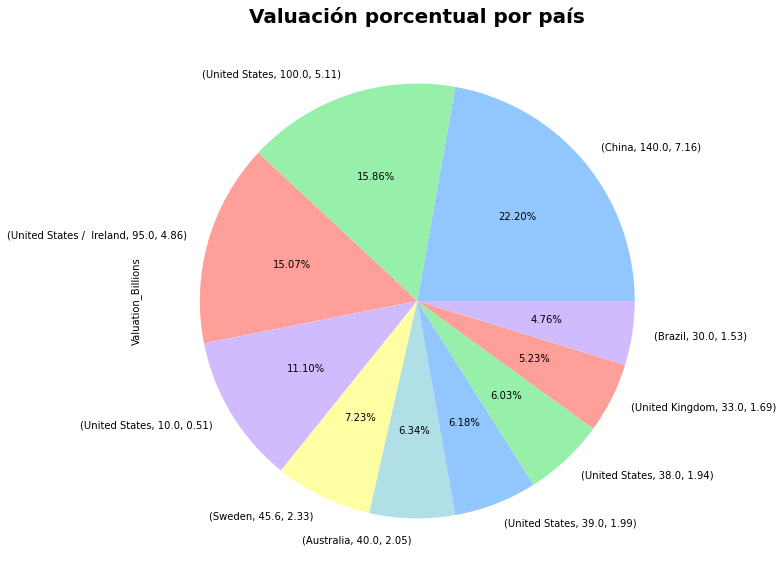

In [62]:
total_percentage = clean_df.groupby(['Country', 'Valuation_Billions', 'Valuation_Percentage'])['Valuation_Billions'].sum().sort_values(ascending = False).head(10)

#total_percentage

total_percentage_plot = total_percentage.plot.pie(x='Total_Valuation', y='Countries',figsize=(10,10), autopct = '%.2f%%'); #no puedo hacer explode acá

plt.title('Valuación porcentual por país', fontdict = {'fontsize':20, 'fontweight':'bold'});

#acá faltaría modificar ejes, y valores de cada proporcion

In [2]:
#conclusion: lo que encontramos

## 5. Conclusiones

In [3]:
#Lo que encontramos, lo que llamó la atencion, como se podria seguir el análisis

## 6. Referencias